In [3]:
%pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

**WORKING**
- The `image_dataset_from_directory` function is used to load image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for training efficiency.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0.

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    './v2/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 576 files belonging to 3 classes.


**WORKING**
- The image_dataset_from_directory function is used to load validation image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [6]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    './v2/valid',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 53 files belonging to 3 classes.


**WORKING**

- The code sets the `path to a directory containing images` of tomato leaves affected by the Tomato Yellow Leaf Curl Virus and so on in the next cells of code.
- It retrieves a list of all image file names in the directory.
- Using matplotlib, it displays the first 6 images along with their corresponding labels.
- For each image, it loads the image, displays it in a subplot, and sets the title to the image label, showing the visual representation of the dataset.

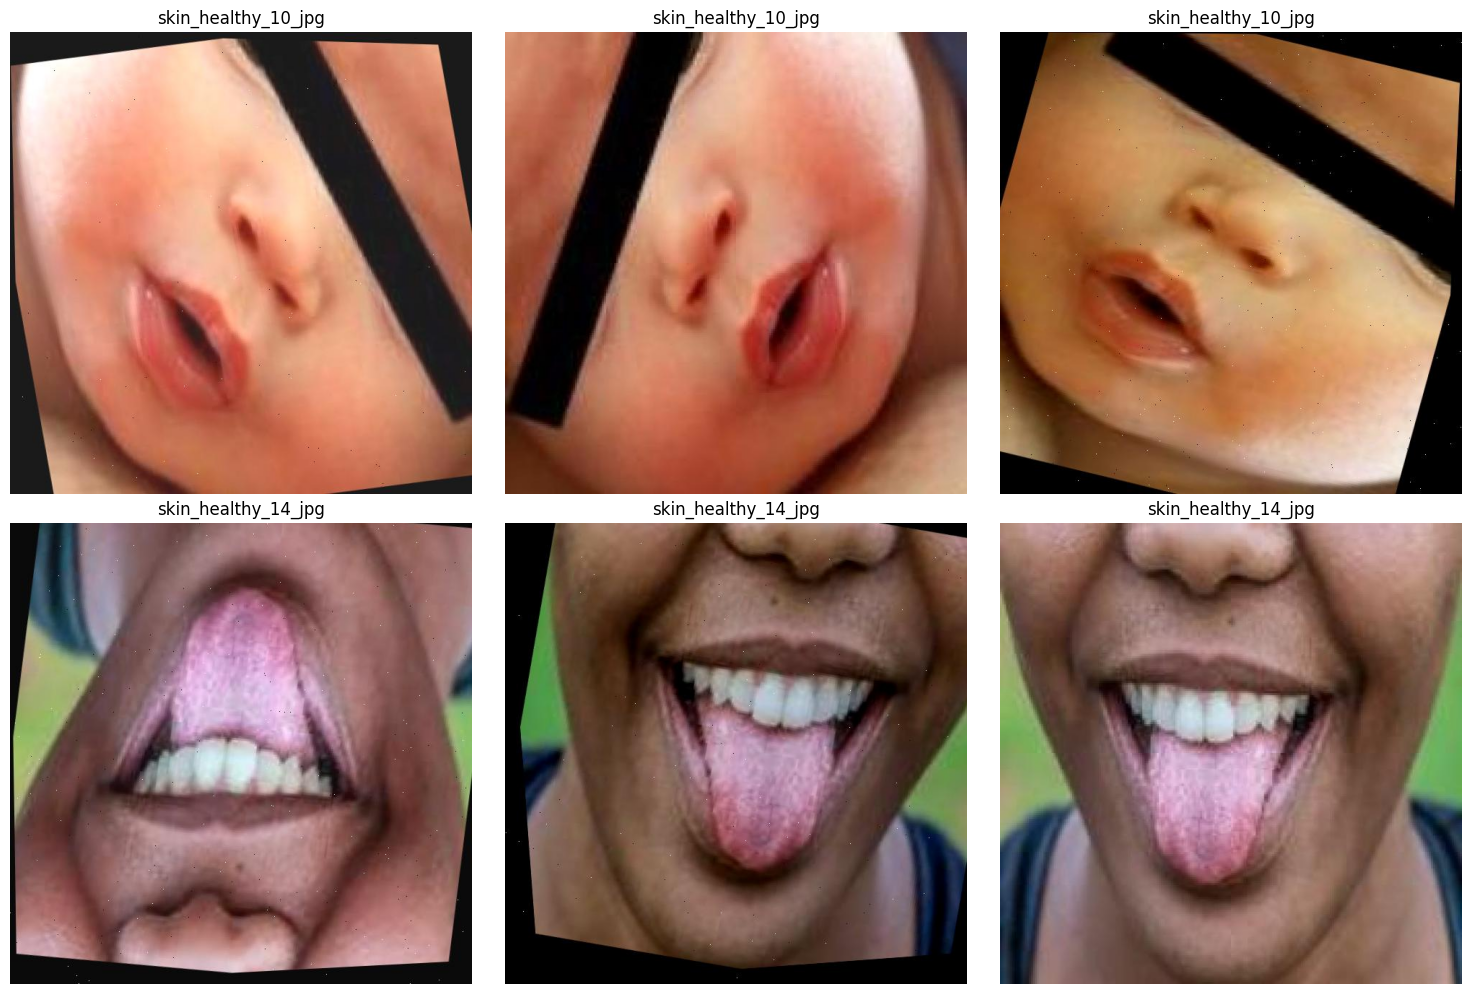

In [7]:
# Path to the directory containing images
path = "./v2/train/Kulit Sehat"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

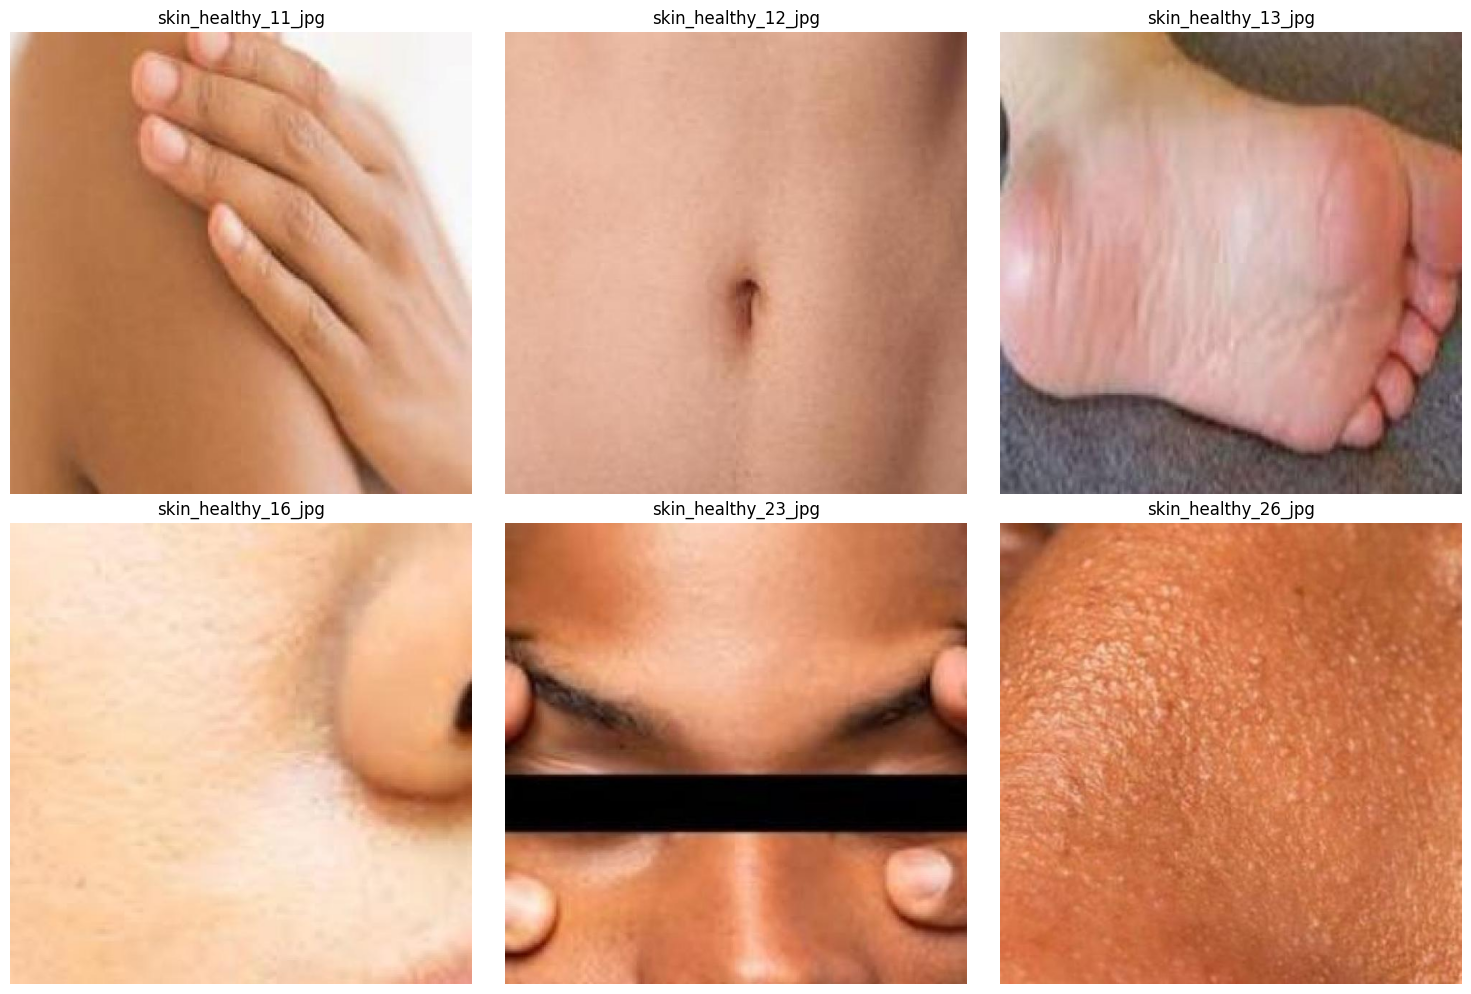

In [8]:
# Path to the directory containing images
path = "./v2/valid/Kulit Sehat"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


**WORKING**
- The code initializes a `DenseNet121` model with weights pre-trained on the ImageNet dataset.
- The `include_top=False argument` specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
- The `input_shape=(256,256,3) argument` specifies the shape of the input images that the model expects, which is `256x256` pixels with 3 channels (RGB).
- The initialized model `conv_base` can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [9]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


**WHY FALSE ?**
- Setting conv_base.trainable = False freezes the weights of the pre-trained DenseNet121 model.
- This is done to prevent the weights from being updated during the training of the custom classification head.
- Freezing the pre-trained weights helps in utilizing the learned features from the ImageNet dataset without altering them.
- It also reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [10]:
conv_base.trainable = False

In [ ]:
# Summary of the pretrained model
conv_base.summary()

**WORKING**

- It initializes a Sequential model and adds the `pre-trained` DenseNet121` model (conv_base) ` as the base.
- The model flattens the output from the base model and adds two fully connected layers with `ReLU activation`.
- `Batch normalization` is applied after each fully connected layer to improve training stability and speed.

In [18]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(3, activation='softmax'))

**WORKING**

- The compile method is used to configure the model for training.
- The optimizer=Adam(lr=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
- The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
- The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

**WORKING**
- The `fit` method is used to train the model on the training data (`train_data`) for a specified number of epochs (100 in this case).
- The `validation_data=val_data` argument specifies the validation data to evaluate the model performance after each epoch.
- The `callbacks=[EarlyStopping(patience=0)]` argument specifies the use of early stopping to prevent overfitting. The training will stop if the validation loss does not improve after 0 epochs.
- The `history` variable stores the training history, including metrics such as loss and accuracy, which can be used for analysis and visualization.

In [20]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
history = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 842ms/step - accuracy: 0.4119 - loss: 1.2297 - val_accuracy: 0.6981 - val_loss: 0.8690
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 726ms/step - accuracy: 0.6121 - loss: 0.8375 - val_accuracy: 0.7170 - val_loss: 0.7647
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 746ms/step - accuracy: 0.7653 - loss: 0.5864 - val_accuracy: 0.7547 - val_loss: 0.6718
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 748ms/step - accuracy: 0.8178 - loss: 0.4623 - val_accuracy: 0.8302 - val_loss: 0.5857
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 756ms/step - accuracy: 0.8777 - loss: 0.4069 - val_accuracy: 0.8868 - val_loss: 0.5122
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 877ms/step - accuracy: 0.8349 - loss: 0.4036 - val_accuracy: 0.9245 - val_loss: 0.4468
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 860ms/step - accuracy: 0.8886 - loss: 0.3149 - val_accuracy: 0.9245 - val_loss: 0.3903
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 871ms/step - accuracy: 0.9119 - loss: 0.2723 - 

In [21]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - accuracy: 0.9080 - loss: 0.2182
Validation Loss: 0.18557946383953094
Validation Accuracy: 0.9245283007621765


In [23]:
!pip install numpy pandas opencv-python matplotlib seaborn scikit-learn

In [25]:
import os, random
import numpy as np
import pandas as pd
import imghdr
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

In [31]:
val_gen = ImageDataGenerator(rescale=1/255)

validation_generator = val_gen.flow_from_directory('./v2/valid', target_size=(256,256), batch_size=25,
                                              color_mode='rgb', class_mode='categorical')

test_generator =  val_gen.flow_from_directory('./v2/test', target_size=(256,256), batch_size=25,
                                              color_mode='rgb', class_mode='categorical')

Found 53 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [32]:
# Evaluate on the validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f'\033[1mValidation Accuracy: {val_acc * 100:.2f}%\033[0m')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'\033[1mTest Accuracy: {test_acc * 100:.2f}%\033[0m')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.9023 - loss: 0.2115
Validation Accuracy: 92.45%
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8612 - loss: 0.3567
Test Accuracy: 85.19%


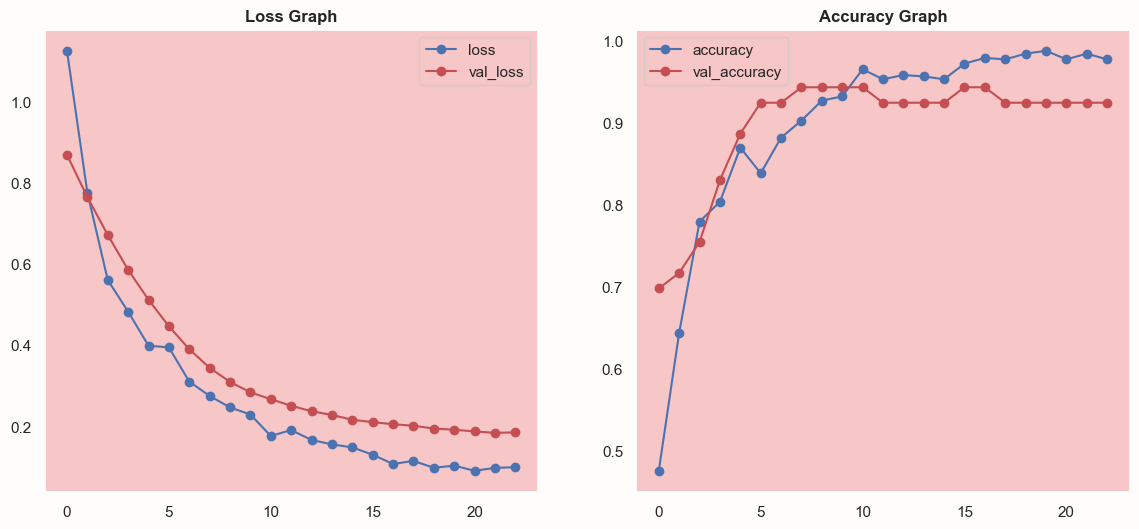

In [40]:
sns.set_theme(rc={'axes.facecolor':'#f7c6c6','figure.facecolor':'#fffcfc'})

fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(history.history['loss'],label='loss', marker='o', color='b')
ax[0].plot(history.history['val_loss'],label='val_loss', marker='o', color='r')
ax[0].set_title('Loss Graph',fontweight='bold')
ax[0].legend()
ax[0].grid(False)

ax[1].plot(history.history['accuracy'],label='accuracy',marker='o', color='b')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy',marker='o', color='r')
ax[1].set_title('Accuracy Graph',fontweight='bold')
ax[1].legend()
ax[1].grid(False)

plt.show()

In [41]:
# Save entire model (architecture + weights + optimizer)
model.save('densenet.keras')  # or 'my_model.h5'

# Load it later
# from tensorflow.keras.models import load_model
# model = load_model('my_model.h5')